In [1]:
import sys
sys.path.insert(0, '../..')

In [2]:
%load_ext autoreload
%autoreload 2
import edunn as nn
import numpy as np

# Clasificación con CNN

También podemos entrenar una red neuronal para clasificar las imágenes de dígitos escritos a mano del conjunto de datos de [MNIST](http://yann.lecun.com/exdb/mnist/). Este conjunto de datos es un clásico en el aprendizaje automático, y es un buen punto de partida para probar las redes neuronales convolucionales. Intentá probar agregando/quitando capas adicionales y variando los parámetros de las mismas.


In [3]:
x,y,classes=nn.datasets.load_classification("mnist")
# normalización de los datos
x = (x-x.mean())/x.std()
n, din = x.shape
# calcular cantidad de clases
classes = y.max()+1
print("Tamaños de x e y:", x.shape,y.shape)
x.min(), x.max()

Tamaños de x e y: (1200, 784) (1200,)


(-0.4290351103874587, 2.7838089919296496)

In [4]:
i=4

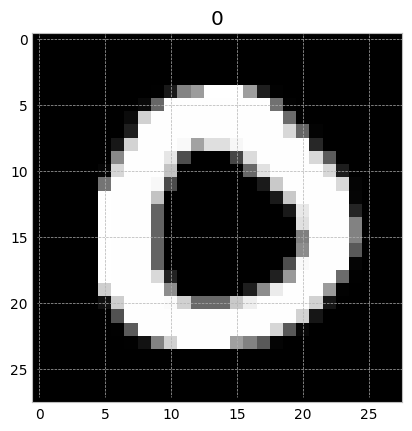

In [5]:
import matplotlib.pyplot as plt
plt.title(y[i])
plt.imshow(np.reshape(x[i],(28,28)),cmap="gray")

In [6]:
x = x.reshape(-1, 1, 28, 28)

In [7]:
def calculate_in_features(input_size, layers):
    output_size = input_size
    for layer in layers:
        output_size = (output_size - layer['kernel_size'] + 2*layer['padding']) // layer['stride'] + 1
        out_channels = layer['out_channels']
    in_features = output_size * output_size * out_channels
    return in_features

layers = [
    {'out_channels': 32,    'kernel_size': 3,   'stride': 1, 'padding': 0},
    # {'out_channels': 32,    'kernel_size': 2,   'stride': 2, 'padding': 0},
    # {'out_channels': 64,    'kernel_size': 3,   'stride': 1, 'padding': 0},
    # {'out_channels': 64,    'kernel_size': 2,   'stride': 2, 'padding': 0},
]
input_size = x.shape[-1]
in_features = calculate_in_features(input_size, layers)
in_features

21632

In [8]:
#Red con dos capas 
initializer = nn.initializers.KaimingNormal()#nn.initializers.RandomNormal(1e-20)
model = nn.Sequential([
    nn.Convolution2D(in_channels=1,     out_channels=32,    kernel_size=(3,3),      stride=1, padding=0, kernel_initializer=initializer),
    nn.ReLU(),
    # nn.MaxPool2d(kernel_size=2, stride=2),
    # nn.Convolution2D(in_channels=32,    out_channels=64,    kernel_size=(3,3),      stride=1, padding=0, kernel_initializer=initializer),
    # nn.ReLU(),
    # nn.MaxPool2d(kernel_size=2, stride=2),
    nn.Flatten(),
    nn.Dense(input_size=in_features,output_size=32,activation_name="relu",linear_initializer=None),
    nn.Dense(input_size=32,output_size=classes,activation_name="softmax",linear_initializer=None),
    ])

error = nn.MeanError(nn.CrossEntropyWithLabels())
optimizer = nn.GradientDescent(lr=0.1,epochs=10,batch_size=16)

In [9]:
# np.set_printoptions(threshold=sys.maxsize)

optim. Sequential_0:   0%|          | 0/10 [00:00<?, ?it/s]

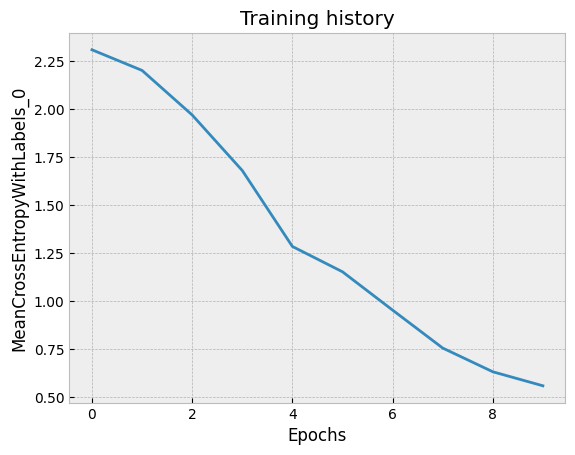

In [10]:
# Algoritmo de optimización
history = optimizer.optimize(model,x,y,error)
nn.plot.plot_history(history,error_name=error.name)

In [11]:
print("Métricas del modelo:")
y_pred=model.forward(x)
y_pred_labels=nn.utils.onehot2labels(y_pred)
nn.metrics.classification_summary(y,y_pred_labels)

Métricas del modelo:
Accuracy: 0.8733333333333333 (10 classes)
Confusion matrix: (rows true, columns pred)
[[129   0   0   0   0   0   0   0   0   0]
 [  1 124   1   0   0   0   1   0   0   0]
 [  0   2 124   3   0   0   2  10   0   0]
 [  0   0   1 110   0   2   0   1   0   0]
 [  0   0   0   0 114   0   1   2   0   0]
 [  5   0   0   2   0  94   0   0   0   6]
 [  7   0   1   0   0   0 108   1   0   0]
 [  0   0   0   0  19   0   0 104   0   0]
 [  8  18   0   9   1   2   0   5  65   4]
 [  2   0   0   0  35   0   0   0   0  76]]


---

In [12]:
x,y,classes=nn.datasets.load_classification("mnist")
# normalización de los datos
x = (x-x.mean())/x.std()
n, din = x.shape
# calcular cantidad de clases
classes = y.max()+1
print("Tamaños de x e y:", x.shape,y.shape)
x.min(), x.max()

Tamaños de x e y: (1200, 784) (1200,)


(-0.4290351103874587, 2.7838089919296496)

In [13]:
hidden_dim=32
#Red con dos capas 
model = nn.Sequential([nn.Dense(din,hidden_dim,activation_name="relu"),
                       nn.Dense(hidden_dim,classes,activation_name="softmax"),
                      ])

error = nn.MeanError(nn.CrossEntropyWithLabels())
optimizer = nn.GradientDescent(lr=0.01,epochs=100,batch_size=16)

optim. Sequential_1:   0%|          | 0/100 [00:00<?, ?it/s]

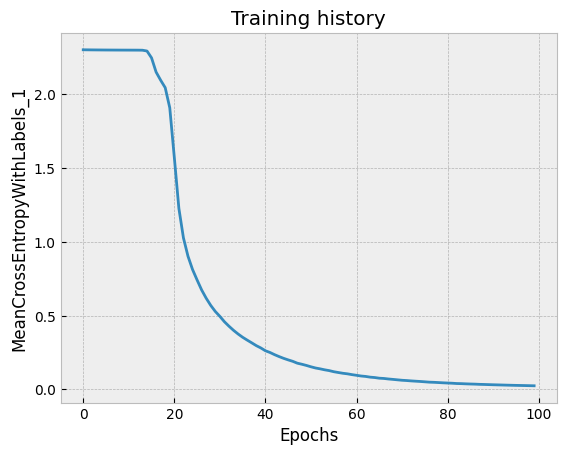

In [14]:
# Algoritmo de optimización
history = optimizer.optimize(model,x,y,error)
nn.plot.plot_history(history,error_name=error.name)

In [15]:
print("Métricas del modelo:")
y_pred=model.forward(x)
y_pred_labels=nn.utils.onehot2labels(y_pred)
nn.metrics.classification_summary(y,y_pred_labels)

Métricas del modelo:
Accuracy: 0.9991666666666666 (10 classes)
Confusion matrix: (rows true, columns pred)
[[129   0   0   0   0   0   0   0   0   0]
 [  0 127   0   0   0   0   0   0   0   0]
 [  0   0 141   0   0   0   0   0   0   0]
 [  0   1   0 113   0   0   0   0   0   0]
 [  0   0   0   0 117   0   0   0   0   0]
 [  0   0   0   0   0 107   0   0   0   0]
 [  0   0   0   0   0   0 117   0   0   0]
 [  0   0   0   0   0   0   0 123   0   0]
 [  0   0   0   0   0   0   0   0 112   0]
 [  0   0   0   0   0   0   0   0   0 113]]
